w= 0.0
	 1.0 3.0 0.0 9.0
	 2.0 6.0 0.0 36.0
	 3.0 9.0 0.0 81.0
	 4.0 12.0 0.0 144.0
	 5.0 15.0 0.0 225.0
MSE= 99.0
w= 0.5
	 1.0 3.0 0.5 6.25
	 2.0 6.0 1.0 25.0
	 3.0 9.0 1.5 56.25
	 4.0 12.0 2.0 100.0
	 5.0 15.0 2.5 156.25
MSE= 68.75
w= 1.0
	 1.0 3.0 1.0 4.0
	 2.0 6.0 2.0 16.0
	 3.0 9.0 3.0 36.0
	 4.0 12.0 4.0 64.0
	 5.0 15.0 5.0 100.0
MSE= 44.0
w= 1.5
	 1.0 3.0 1.5 2.25
	 2.0 6.0 3.0 9.0
	 3.0 9.0 4.5 20.25
	 4.0 12.0 6.0 36.0
	 5.0 15.0 7.5 56.25
MSE= 24.75
w= 2.0
	 1.0 3.0 2.0 1.0
	 2.0 6.0 4.0 4.0
	 3.0 9.0 6.0 9.0
	 4.0 12.0 8.0 16.0
	 5.0 15.0 10.0 25.0
MSE= 11.0
w= 2.5
	 1.0 3.0 2.5 0.25
	 2.0 6.0 5.0 1.0
	 3.0 9.0 7.5 2.25
	 4.0 12.0 10.0 4.0
	 5.0 15.0 12.5 6.25
MSE= 2.75
w= 3.0
	 1.0 3.0 3.0 0.0
	 2.0 6.0 6.0 0.0
	 3.0 9.0 9.0 0.0
	 4.0 12.0 12.0 0.0
	 5.0 15.0 15.0 0.0
MSE= 0.0
w= 3.5
	 1.0 3.0 3.5 0.25
	 2.0 6.0 7.0 1.0
	 3.0 9.0 10.5 2.25
	 4.0 12.0 14.0 4.0
	 5.0 15.0 17.5 6.25
MSE= 2.75
w= 4.0
	 1.0 3.0 4.0 1.0
	 2.0 6.0 8.0 4.0
	 3.0 9.0 12.0 9.0
	 4.0 12.0 16.0 16.0
	 

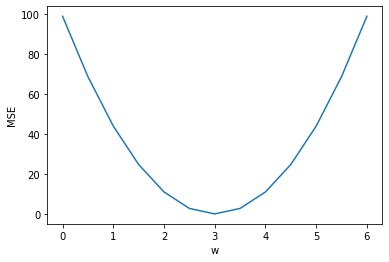

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_data = [1.0,2.0,3.0,4.0,5.0]
y_data = [3.0,6.0,9.0,12.0,15.0]

def forward(x):
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

w_list = []
MSE_list = []

for w in np.arange(0.0,6.5,0.5):
    print("w=", w)
    loss_sum=0
    
    for x,y in zip(x_data,y_data):
        
        y_pred = forward(x)
        loss_val = loss(x,y)
        loss_sum += loss_val
        print("\t",x,y,y_pred,loss_val)
        
    print("MSE=", loss_sum/len(x_data))
    w_list.append(w)
    MSE_list.append(loss_sum/len(x_data))
    
plt.plot(w_list, MSE_list)
plt.ylabel('MSE')
plt.xlabel('w')
plt.show()

In [2]:
#勾配計算
x_data = np.array([1.0,2.0,3.0,4.0,5.0],dtype=np.float32)
y_data = np.array([3.0,6.0,9.0,12.0,15.0],dtype=np.float32)

In [3]:
w = 1.0
w_list = [w]
loss_list = []

def forward(x):
    return x*w

def loss(y,y_pred):
    return ((y_pred - y)**2).mean()

def gradient(x,y,y_pred):
    return np.dot(2*x, y_pred-y).mean()

In [4]:
epochs = 10

for epoch in range(epochs):
    y_pred = forward(x_data)
    loss_val = loss(y_data,y_pred)
    
    grad_val = gradient(x_data,y_data,y_pred)
    
    w = w - 0.01*grad_val
    
    w_list.append(w)
    loss_list.append(loss_val)
    
    print(f'epoch {epoch}: w = {w:.3f}: loss{loss_val:.3f}')
    

epoch 0: w = 3.200: loss44.000
epoch 1: w = 2.980: loss0.440
epoch 2: w = 3.002: loss0.004
epoch 3: w = 3.000: loss0.000
epoch 4: w = 3.000: loss0.000
epoch 5: w = 3.000: loss0.000
epoch 6: w = 3.000: loss0.000
epoch 7: w = 3.000: loss0.000
epoch 8: w = 3.000: loss0.000
epoch 9: w = 3.000: loss0.000


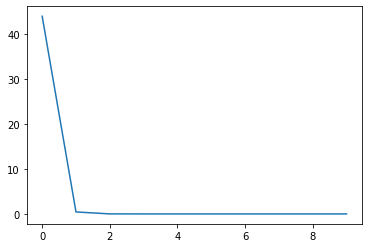

In [5]:
plt.plot(loss_list)

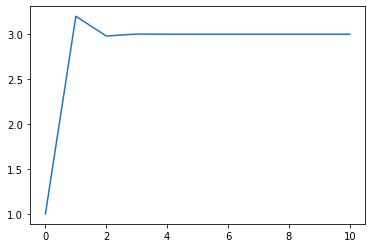

In [6]:
plt.plot(w_list)

In [7]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

In [9]:
torch.manual_seed(3)

model = Model(1,1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [10]:
x = torch.tensor([1,2,3,4,5],dtype=torch.float).view(-1,1)
y = torch.tensor([3,6,9,12,15],dtype=torch.float).view(-1,1)

In [11]:
epochs = 100
loss_list = []
w_list = []

for epoch in range(epochs):
    
    y_pred = model.forward(x)
    loss_val = criterion(y_pred,y)
    
    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    
    loss_list.append(loss_val)
    w_list.append(model.linear.weight.item())

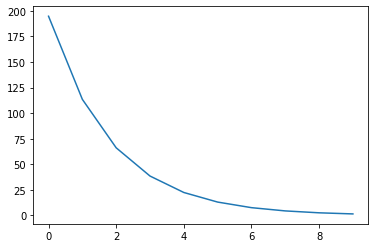

In [12]:
plt.plot(loss_list)